# MNIST TF implementation

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [12]:
#importing dataset
from keras.datasets import mnist

In [13]:
#load mnist data
def load_data():
  (X_train, y_train), (X_test, y_test) = mnist.load_data()

  #normalize
  X_train = X_train.astype('float32') / 255.0
  X_test = X_test.astype('float32') / 255.0

  #convert output into one-hot encoded
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)

  return X_train, y_train, X_test, y_test

In [14]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense,Flatten

In [15]:
model = Sequential(
    [
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ]    
)

model.compile(optimizer='adam',
            loss='categorical_crossentropy', 
            metrics=['accuracy'])

c:\Users\ashok\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
X_train, y_train, X_test, y_test = load_data()

In [17]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test)) 

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8759 - loss: 0.4403 - val_accuracy: 0.9602 - val_loss: 0.1362
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9624 - loss: 0.1268 - val_accuracy: 0.9680 - val_loss: 0.1040
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9763 - loss: 0.0786 - val_accuracy: 0.9756 - val_loss: 0.0795
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9828 - loss: 0.0588 - val_accuracy: 0.9763 - val_loss: 0.0751
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9863 - loss: 0.0457 - val_accuracy: 0.9781 - val_loss: 0.0720
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9884 - loss: 0.0361 - val_accuracy: 0.9783 - val_loss: 0.0747
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9917 - loss: 0.0269 - val_accuracy: 0.9777 - val_loss: 0.0761
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9937 - loss: 0.0208 - 

In [25]:
test_accuracy = model.evaluate(X_test, y_test)
print('Test accuracy: {test_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.9754 - loss: 0.0934
Test accuracy: {test_accuracy}


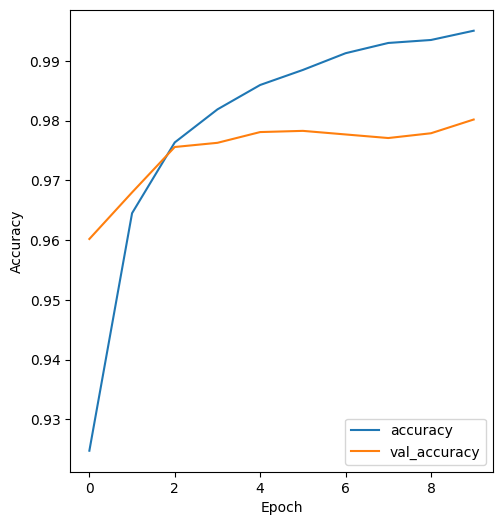

In [21]:
#plot training and validation accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step


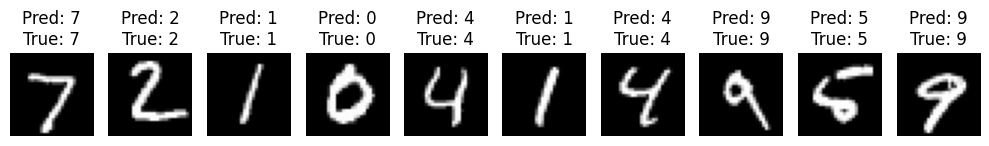

In [22]:
# see predictions
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)
y_test_labels = np.argmax(y_test, axis=1)   

#plotting images
num_examples = 10

plt.figure(figsize=(10, 5))
for i in range(num_examples):
    plt.subplot(2, num_examples, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Pred: {predictions[i]}\nTrue: {y_test_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
